## Verificare di utilizzare l'ambiente dove 'e installato pandas_datareder

In [1]:
import sys
sys.executable


'/home/antoiovi/anaconda3/envs/Finantial/bin/python'

In [2]:
from pandas_datareader import data


/home/antoiovi/anaconda3/envs/Finantial/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# Only get the adjusted close.
aapl = data.DataReader("FCA", 
                       start='2020-06-1', 
                       end='2020-06-30', 
                       data_source='yahoo')['Adj Close']

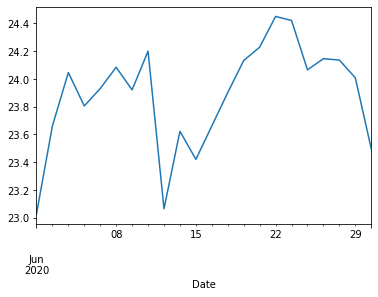

In [4]:
aapl.plot()

In [ ]:
# Only get the adjusted close.
ispy = data.DataReader("ISPY", 
                       start='2019-1-1', 
                       end='2019-12-31', 
                       data_source='yahoo')['Adj Close']

Installato yfinance
    
    ~$ source activate Finantial
    
    pip install yfinance --upgrade --no-cache-dir

In [4]:
import yfinance as yf

In [5]:
msft = yf.Ticker("XCHA.MI")
xcha = msft.history(period="max")

In [6]:
xcha

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-08-13,6.18,6.20,6.13,6.13,53735,0,0
2012-08-14,6.14,6.15,6.10,6.13,2265,0,0
2012-08-16,6.05,6.06,6.05,6.00,1850,0,0
2012-08-17,6.03,6.03,6.01,6.00,12300,0,0
2012-08-20,6.00,6.03,6.00,5.97,4000,0,0
...,...,...,...,...,...,...,...
2020-08-25,13.31,13.33,13.26,13.29,16752,0,0
2020-08-26,13.21,13.24,13.18,13.20,89558,0,0
2020-08-27,13.25,13.28,13.20,13.23,34535,0,0


In [7]:
csuss = yf.Ticker("CSUSS.MI")
csuss = msft.history(period="max")
csuss.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-08-13,6.18,6.20,6.13,6.13,53735,0,0
2012-08-14,6.14,6.15,6.10,6.13,2265,0,0
2012-08-16,6.05,6.06,6.05,6.00,1850,0,0
2012-08-17,6.03,6.03,6.01,6.00,12300,0,0
2012-08-20,6.00,6.03,6.00,5.97,4000,0,0


In [8]:
msft = yf.Ticker("ISPY.MI")
ispy = msft.history(period="max")

In [36]:
ispy

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-11-17,9.03,9.06,9.00,9.03,922,0,0
2015-11-18,9.06,9.10,9.03,9.08,6024,0,0
2015-11-19,9.18,9.19,9.11,9.12,75169,0,0
2015-11-20,9.22,9.27,9.19,9.25,34241,0,0
2015-11-23,9.29,9.51,9.22,9.28,22645,0,0
...,...,...,...,...,...,...,...
2020-06-23,16.80,16.96,16.75,16.87,190197,0,0
2020-06-24,16.90,16.90,16.34,16.39,84246,0,0
2020-06-25,16.50,16.62,16.27,16.57,56479,0,0


In [20]:
df=ispy
#df=SIL3
df['MM20']=df['Open'].rolling(window=20).mean()
df['MM5']=df['Open'].rolling(window=5).mean()
df['MM13']=df['Open'].rolling(window=13).mean()
df['MM50']=df['Open'].rolling(window=50).mean()


import math
import numpy as np
credito=0
lastbuy=0
guadagno=0
def buy(row):
    global credito,lastbuy,buyed
    print('{} buy  {} '.format(row.name,row['Close']))
    credito=credito+1
    lastbuy=row['Close']
    buyed.append(lastbuy)
def sell(row):
    global credito,lastbuy,guadagno
    g=(row['Close']-lastbuy)
    guadagno=guadagno+g
    print('{} sell  {} Guadagno {} '.format(row.name,row['Close'],g))
    credito=credito-1
    
buyed=[]

mm13=0
mm50=None
stato='START'
#Posizione media veloce (per indicare l'entry point)
POSIZONE_MV='START'
BUY=False
for index, row in df.iterrows():
    #print('mm13 :{} mm50 {} stato {}'.format(mm13,mm50,stato))
    if stato== 'START':
        #print(stato)
        mm50=row['MM50']
        mm13=row['MM13']
        if (math.isnan(mm50)|math.isnan(mm13)):
            stato=='START'
        else:
            stato='NULLO' 
            if mm13>mm50:
                POSIZONE_MV='SOPRA' 
            else :
                POSIZONE_MV='SOTTO'
    elif stato=='NULLO':
        #print(stato)
        if row['MM13']>row['MM50']:
            # Se Media veloce SORPASSA media lenta
            if POSIZONE_MV=='SOTTO':
                buy(row)
                stato='BUY'
            POSIZONE_MV='SOPRA'
        elif row['MM13']<row['MM50']:
            POSIZONE_MV='SOTTO'
            if stato== 'BUY':
                sell(row) 
                stato='NULLO'
        mm50=row['MM50']
        mm13=row['MM13']
    elif stato == 'BUY':
        #print(stato)
        if row['MM13']<row['MM50']:
            sell(row) 
            stato='NULLO'
            POSIZONE_MV='SOTTO'
        mm50=row['MM50']
        mm13=row['MM13']
last=df.iloc[-1][2]
prezzomedio=np.mean(buyed)
perc=100*guadagno/prezzomedio
print('Credito {:0.2f},  Guadagno {:0.2f} Prezzo medio : {:0.2f} Perc. {:0.2f}  '.format((credito*last),guadagno,prezzomedio,perc))


2016-03-14 00:00:00 buy  7.6 
2016-05-09 00:00:00 sell  7.22 Guadagno -0.3799999999999999 
2016-05-30 00:00:00 buy  7.91 
2016-10-25 00:00:00 sell  8.8 Guadagno 0.8900000000000006 
2016-11-18 00:00:00 buy  9.45 
2017-04-27 00:00:00 sell  9.94 Guadagno 0.4900000000000002 
2017-05-24 00:00:00 buy  10.02 
2017-05-29 00:00:00 sell  10.06 Guadagno 0.040000000000000924 
2017-06-07 00:00:00 buy  10.23 
2017-06-28 00:00:00 sell  9.87 Guadagno -0.3600000000000012 
2017-09-26 00:00:00 buy  9.31 
2018-02-09 00:00:00 sell  9.63 Guadagno 0.3200000000000003 
2018-02-23 00:00:00 buy  10.46 
2018-07-10 00:00:00 sell  12.17 Guadagno 1.709999999999999 
2018-07-17 00:00:00 buy  12.51 
2018-08-07 00:00:00 sell  12.23 Guadagno -0.27999999999999936 
2018-08-22 00:00:00 buy  12.4 
2018-10-11 00:00:00 sell  11.65 Guadagno -0.75 
2018-12-12 00:00:00 buy  12.28 
2018-12-20 00:00:00 sell  11.01 Guadagno -1.2699999999999996 
2019-01-25 00:00:00 buy  12.23 
2019-05-28 00:00:00 sell  13.94 Guadagno 1.70999999999999

In [9]:
W_3SIL = yf.Ticker("3SIL.MI")
SIL3 = W_3SIL.history(period="max")

In [10]:
SIL3

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-12-02,11.3000,11.3200,10.9500,10.8000,1475,0,0
2013-12-03,10.0950,10.1800,10.0950,10.2650,4699,0,0
2013-12-04,10.0000,10.6650,9.9900,10.5750,1030,0,0
2013-12-05,10.7250,10.8250,10.5100,10.8450,5500,0,0
2013-12-06,10.7450,10.7450,10.7450,10.8200,2000,0,0
...,...,...,...,...,...,...,...
2020-08-27,4.6300,4.9600,4.2510,4.4500,984145,0,0
2020-08-28,4.6865,4.8385,4.6200,4.8195,765491,0,0
2020-08-31,5.7200,5.7200,5.7200,5.7200,0,0,0


In [11]:
SIL3.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1707.000000,1707.000000,1707.000000,1707.000000,1.707000e+03,1707.0,1707.0
mean,4.289715,4.382756,4.184712,4.283632,2.139935e+05,0.0,0.0
std,2.842623,2.896565,2.780478,2.839027,3.248382e+05,0.0,0.0
min,0.628800,0.675000,0.590000,0.622000,0.000000e+00,0.0,0.0
25%,2.347500,2.395000,2.300500,2.348000,5.989150e+04,0.0,0.0
50%,3.345000,3.425000,3.250000,3.327500,1.305490e+05,0.0,0.0
75%,5.260000,5.405000,5.027500,5.177500,2.555910e+05,0.0,0.0
max,14.600000,14.800000,14.240000,14.775000,6.614312e+06,0.0,0.0


In [14]:
SIL32020=SIL3[SIL3.index.year==2020].describe()

In [17]:
SIL3[(SIL3.index.year==2020) & (SIL3.index.month>6)].describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,43.000000,43.000000,43.000000,43.000000,4.300000e+01,43.0,43.0
mean,3.830295,4.030333,3.644174,3.859553,1.180590e+06,0.0,0.0
std,1.283113,1.352438,1.195410,1.257351,1.172312e+06,0.0,0.0
min,1.967200,2.033700,1.937200,1.967200,0.000000e+00,0.0,0.0
25%,2.360500,2.599500,2.339000,2.558500,4.851290e+05,0.0,0.0
50%,3.902500,4.370000,3.750000,4.118000,7.670880e+05,0.0,0.0
75%,4.668250,4.899250,4.480750,4.701500,1.521218e+06,0.0,0.0
max,6.405000,6.550000,6.122500,6.230000,6.614312e+06,0.0,0.0


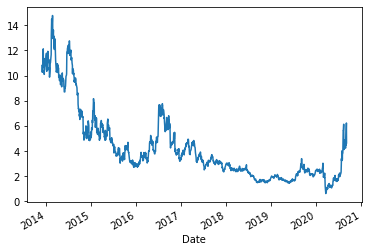

In [24]:
SIL3['Close'].plot()